<a href="https://colab.research.google.com/github/pk2971/Air-Quality-time-series/blob/main/Air_Quality_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pollutants in the air often cause a rise in the temperature at any given time of the day. 
As the day progresses and the traffic increases during a certain time of the day there might be more pollutants in the air(for example during the morning rush hours or when everyone is going back to homes or during the factorys working hours). Our goal is to see if we can predict the amount of pollutants in the air, temperature by studying the patterns across different times.


In [2]:
import pandas as pd
import io

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
#from google.colab import files
#uploaded=files.upload()

In [7]:
df=pd.read_csv("/content/drive/MyDrive/AirQualityUCI.csv",sep=';',decimal='.',quoting=csv.QUOTE_NONE, skip_blank_lines=False)

In [8]:
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
df=df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [10]:
from datetime import datetime as dt
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S' ).dt.time
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [11]:
df['DateTime']=pd.to_datetime(df.Date.astype(str) + ' ' + df.Time.astype(str),errors='coerce')

In [12]:
df['CO(GT)']=df['CO(GT)'].str.replace(",",".")
df['CO(GT)']=df['CO(GT)'].astype(float)

In [13]:
df['C6H6(GT)']=df['C6H6(GT)'].str.replace(",",".")
df['C6H6(GT)']=df['C6H6(GT)'].astype(float)

In [14]:
df['T']=df['T'].str.replace(",",".")
df['T']=df['T'].astype(float)

In [15]:
df['RH']=df['RH'].str.replace(",",".")
df['RH']=df['RH'].astype(float)

In [16]:
df['AH']=df['AH'].str.replace(",",".")
df['AH']=df['AH'].astype(float)

In [17]:
df=df.dropna()

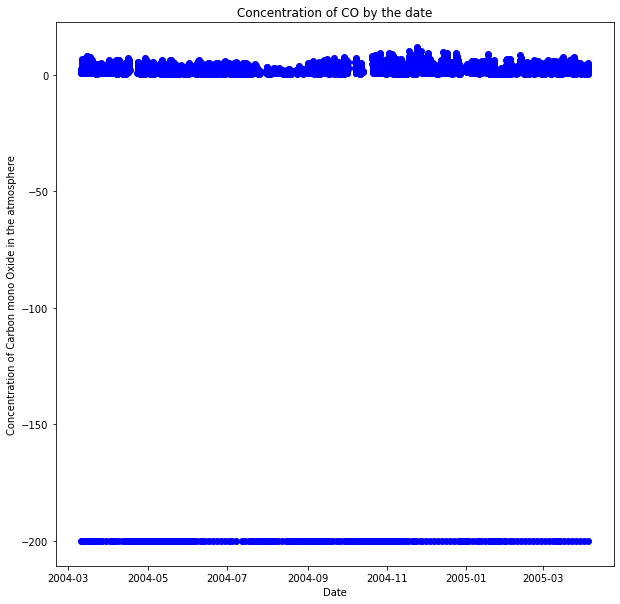

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['CO(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

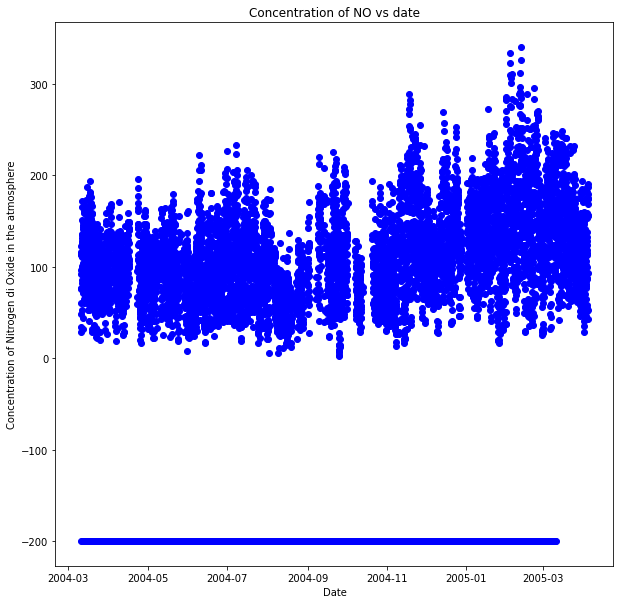

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['NO2(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Nitrogen di Oxide in the atmosphere",
       title="Concentration of NO vs date")

plt.show()